## Load and Organize Data

First let's import the usual data science modules

## KNN Wine Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

Now from the skearn datasets let's load the 'wine' dataset and inspect it

In [2]:
wine=datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

The data is the results of a chemical analysis of wines grown in the same
region in Italy by three different cultivators. There are thirteen different
measurements taken for different constituents found in the three types of
wine.

In [3]:
df=pd.DataFrame(wine["data"],columns=wine["feature_names"])
df["target"]=wine["target"]
df['class']=df['target'].map(lambda ind: wine['target_names'][ind])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


## What is distribution of alcohol content among all of wines? 

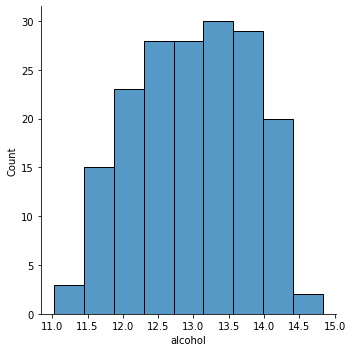

In [4]:
sns.displot(df['alcohol'],kde=0)

## Distribution of classes

alcohol


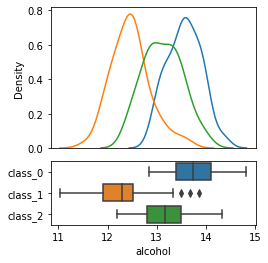

malic_acid


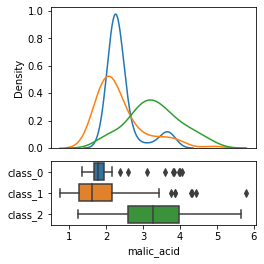

ash


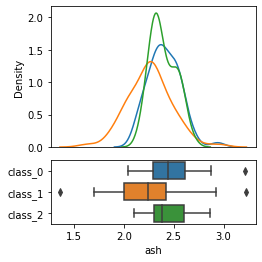

alcalinity_of_ash


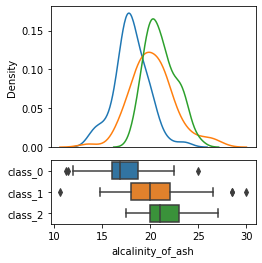

magnesium


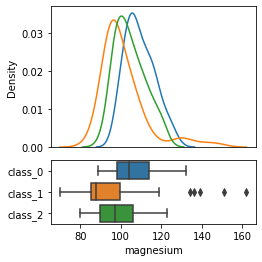

total_phenols


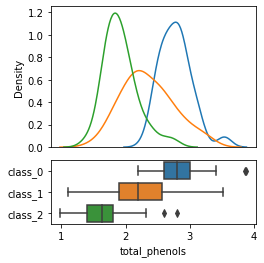

flavanoids


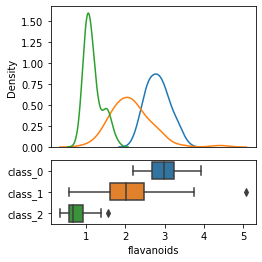

nonflavanoid_phenols


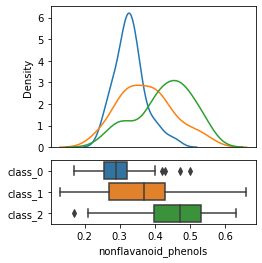

proanthocyanins


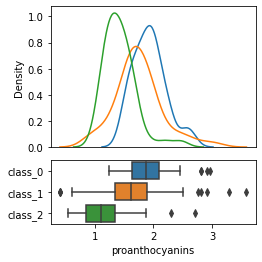

color_intensity


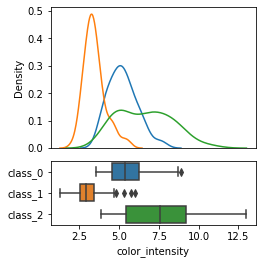

hue


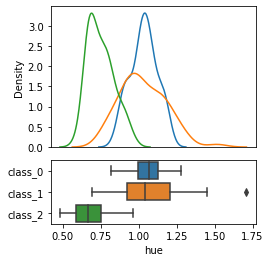

od280/od315_of_diluted_wines


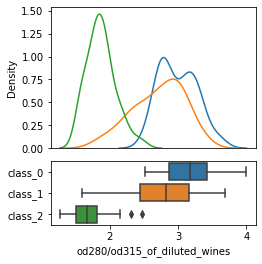

proline


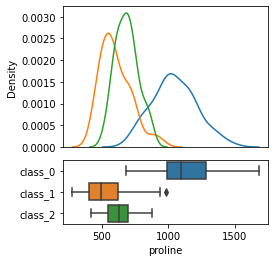

In [5]:
import matplotlib.gridspec as gridspec
for feature in wine["feature_names"]:
    print(feature)
    
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=df,ax=ax2)
    sns.kdeplot(df[feature][df.target==0],ax=ax1,label='0')
    sns.kdeplot(df[feature][df.target==1],ax=ax1,label='1')
    sns.kdeplot(df[feature][df.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

## Test Train Split

In [12]:
x=df
y=x.pop("class")

In [13]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
y.head()

0    class_0
1    class_0
2    class_0
3    class_0
4    class_0
Name: class, dtype: object

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=55)

## Split data

In order to effectively train and test our model, we need to separate the data into a training set which we will feed to our model along the the training labels. Then after we have trained the model, we will test it on the 'test' data, so that we can gauge the real-world applicability of the model.

Scikit-learn has a useful functionality here with the `train_test_split()` method. `test_size` governs the proportion of data that is reserved for testing. We want to train on enough data that our model can make good predictions but we also need enough test data to determine if we've overfit the model. We'll use 30% of the data for testing.

In [16]:
x_train.shape

(53, 13)

In [17]:
x_test.shape

(125, 13)

## Training

Number of Neigbhors K value = 20

In [18]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.752

## Tunning Sensitivity of model to n_neighbors

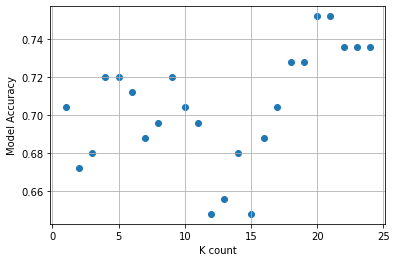

In [19]:
k_range =range(1,25)
scores =[]

for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train) 
    scores.append(knn.score(x_test,y_test))


plt.figure()
plt.xlabel("K count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range, scores)
plt.grid()
plt.xticks([0, 5, 10, 15, 20, 25])
plt.show()

Text(0, 0.5, 'Accuracy')

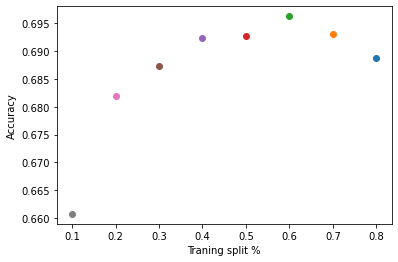

In [20]:
test_sizes= [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

knn= KNeighborsClassifier(n_neighbors= 5)

plt.figure()

for test_size in test_sizes:
    scores = []
    for i in range(1, 1000):
        x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 1 - test_size) 
        knn.fit(x_train, y_train) 
        scores.append(knn.score(x_test, y_test)) 
    plt.scatter(test_size, np.mean(scores))
    
plt.xlabel("Traning split %")
plt.ylabel("Accuracy")

## Predictions

In [21]:
prediction=knn.predict(x_test)             
prediction

array(['class_1', 'class_1', 'class_0', 'class_1', 'class_0', 'class_0',
       'class_0', 'class_2', 'class_1', 'class_0', 'class_1', 'class_0',
       'class_2', 'class_0', 'class_2', 'class_1', 'class_0', 'class_0',
       'class_1', 'class_2', 'class_0', 'class_0', 'class_1', 'class_1',
       'class_0', 'class_1', 'class_2', 'class_2', 'class_1', 'class_1',
       'class_2', 'class_0', 'class_1', 'class_1', 'class_2', 'class_1',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_1', 'class_1',
       'class_1', 'class_0', 'class_0', 'class_2', 'class_0', 'class_1',
       'class_2', 'class_1', 'class_1', 'class_1', 'class_2', 'class_1',
       'class_1', 'class_2', 'class_2', 'class_0', 'class_0', 'class_1',
       'class_2', 'class_1', 'class_2', 'class_1', 'class_1', 'class_0',
       'class_1', 'class_1', 'class_0', 'class_1', 'class_0', 'class_0',
       'class_2', 'class_1', 'class_1', 'class_1', 'class_2', 'class_0',
       'class_0', 'class_1', 'class_1', 'class_2', 

In [22]:
cm = confusion_matrix(y_test, prediction)                                                
cm

array([[47,  0,  7],
       [ 4, 45, 15],
       [ 4, 19, 20]], dtype=int64)

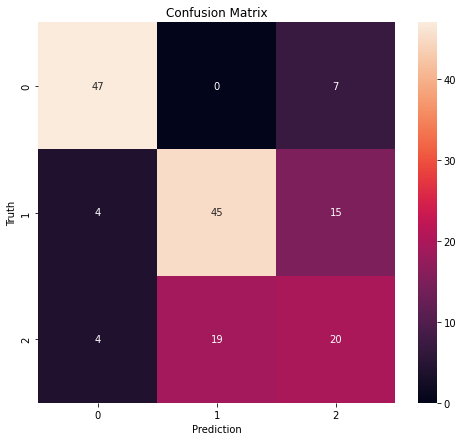

In [23]:
plt.figure(figsize=(8,7))                
sns.heatmap(cm,annot=True)       
plt.title("Confusion Matrix")      
plt.ylabel("Truth")                                        
plt.xlabel("Prediction")
plt.show()